In [1]:
from google.colab import files
uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Saving id_ed25519 to id_ed25519
Mounted at /content/drive


In [2]:
!mkdir -p ~/.ssh
!mv id_ed25519 ~/.ssh/id_ed25519
!chmod 600 ~/.ssh/id_ed25519
!ssh-keyscan -t ed25519 github.com >> ~/.ssh/known_hosts
!git config --global core.sshCommand "ssh -i ~/.ssh/id_ed25519"
!git config --global user.name "jessiejzhou"
!git config --global user.email "jessiejiezhou@gmail.com"
!git clone git@github.com:ved-phadke/math-m148-final-project.git

# github.com:22 SSH-2.0-72017104c
Hi jessiejzhou! You've successfully authenticated, but GitHub does not provide shell access.
Cloning into 'math-m148-final-project'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 5), reused 15 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1002.74 KiB | 8.87 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# Begin Code

In [ ]:
!pip install fuzzywuzzy[speedup]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
dfa = pd.read_csv('pca_audio_features.csv')

In [ ]:
import pandas as pd
dfv = pd.read_csv('pca_video_audio_features.csv')

In [ ]:
import pandas as pd
chills = pd.read_csv('ChillsDB 2 - ChillsDB 2.csv')

In [ ]:
chills = chills[~chills['Stimulus'].str.contains('audio', na=False)]

In [ ]:
chills = chills[~chills['Stimulus'].str.contains('Audio', na=False)]

In [ ]:
chills.rename(columns={"Stimulus": "file"}, inplace=True)
from fuzzywuzzy import process
# find missing stimuli
missing_stimuli = set(chills["file"]) - set(dfv["file"])
# Manual correction dictionary (fixing known mismatches)
manual_corrections = {
    "mr. rogers testimony": "mr rogers testimony",
    "interstellar": "interstellar with hans zimmer",
    "hans zimmer time": "hans zimmer - time",
    "be kind": "be kind (everything everywhere all at once)",
    "rocky": "rocky - retrospective",
    "think too much feel too little": "we think too much and feel too little",
    "amelie": "amélie - helping a blind man",
    "muhammad ali": "muhammed ali",
    "great dictator": "the great dictator",
    "pale blue dot (audio)": "giving is the best communication",
    "dead poets": "dead poet's society - yawp scene",
    "dead poets (audio)": "dead poet's society - yawp scene",
    "italy balconies": "italians making music on balconies under coronavirus quarantine",
    "perfect planet": "a perfect planet",
    "wild geese (audio)": "won't you be my neighbor? (mr. roger's documentary)",
    "unbroken (audio)": "unsung hero",
    "air france": "air france",
    "radiohead reckoner (audio)": "radiohead reckoner (audio)",  # Keep same if identical
}

# Apply manual corrections
chills["file"] = chills["file"].replace(manual_corrections)

# Remaining unmatched stimuli (after manual fixes)
remaining_missing = set(chills["file"]) - set(dfv["file"])

# Fuzzy matching for remaining unmatched stimuli
matched_names = {}
for stimulus in remaining_missing:
    best_match = process.extractOne(stimulus, dfv["file"], score_cutoff=80)
    if best_match:
        matched_names[stimulus] = best_match[0]

# Apply fuzzy matching corrections
chills["file"] = chills["file"].replace(matched_names)

# Merge datasets
merged_df = chills.merge(dfv, on="file", how="left")

In [ ]:
print(len(remaining_missing))

36


In [ ]:
merged_df = merged_df.drop(columns = ['Audio', 'Age', 'Age.1', 'Education', 'Sex', 'Ethnicity', 'Latino', 'Political preferences', 'Republican Strength', 'Democrat Strength', 'Center leaning', 'Political party'])

In [ ]:
dfa = dfa.drop(columns = 'tempo')
merged_df = merged_df.drop(columns = 'tempo')

In [ ]:
merged_df = merged_df.rename(columns={"file": "Stimulus"})


In [ ]:
df_combined = pd.concat([dfa, merged_df], ignore_index=True)  # Resets index after merging

In [ ]:
df_combined

,ID,Chills?,Goosebumps,Chills intensity,#Chills,Stimulus,Duration (in seconds),Arousal pre,Valence Pre,Mood Pre,Arousal Post,Valence Post,Mood post,Liking,Prior Exposure,Reminiscence,spectrogram_pca,mfcc_pca,chroma_pca
0,3,Yes,Yes,100,4,Miserere Me (Audio),1619,10,8,5,0,10,5,10,2,No,"[-13.520295796098745, -5.646265364272731, -0.8...","[39.491204646840075, -4.024765578501591, 1.151...","[-12.039051604457562, 0.3683309019543762, -0.6..."
1,63,No,No,0,1,Miserere Me (Audio),1119,5,4,4,5,4,4,5,2,No,"[-13.520295796098972, -5.646265364273068, -0.8...","[39.49120464683985, -4.0247655785016985, 1.151...","[-12.039051604457665, 0.3683309019533029, -0.6..."
2,80,No,No,0,1,Miserere Me (Audio),1500,10,0,5,10,10,1,0,2,Yes,"[-13.520295796099093, -5.64626536427295, -0.81...","[39.491204646839485, -4.02476557850137, 1.1512...","[-12.039051604457665, 0.3683309019532797, -0.6..."
3,115,No,No,0,1,Miserere Me (Audio),7267,3,6,4,6,5,4,6,2,No,"[-13.52029579609841, -5.646265364272862, -0.81...","[39.491204646839584, -4.02476557850144, 1.1512...","[-12.039051604457665, 0.3683309019532777, -0.6..."
4,162,Yes,No,83,4,Miserere Me (Audio),2223,6,7,4,9,8,5,9,2,No,"[-13.520295796099122, -5.6462653642730745, -0....","[39.49120464683949, -4.024765578501356, 1.1512...","[-12.039051604457665, 0.3683309019532777, -0.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,3014,Yes,Yes,63,2,Dead Poet's Society - YAWP Scene,1154,7,4,2,9,8,5,9,1,No,"[624.5852510551416, -307.6726687612623, 87.333...","[81.28687727888031, -22.65843815471585, 12.480...","[4.103702449800128, -25.749882482114057, 11.56..."
2931,3015,Yes,Yes,81,2,Dead Poet's Society - YAWP Scene,1040,7,10,5,8,6,4,8,2,Yes,"[624.5852510551416, -307.6726687612623, 87.333...","[81.28687727888031, -22.65843815471585, 12.480...","[4.103702449800128, -25.749882482114057, 11.56..."
2932,3016,No,No,0,1,Dead Poet's Society - YAWP Scene,1057,2,8,4,2,5,2,3,1,No,"[624.5852510551416, -307.6726687612623, 87.333...","[81.28687727888031, -22.65843815471585, 12.480...","[4.103702449800128, -25.749882482114057, 11.56..."
2933,3017,No,No,0,1,Dead Poet's Society - YAWP Scene,1972,6,5,3,2,6,4,9,2,No,"[624.5852510551416, -307.6726687612623, 87.333...","[81.28687727888031, -22.65843815471585, 12.480...","[4.103702449800128, -25.749882482114057, 11.56..."


In [ ]:
# Convert 'Yes' -> 1 and 'No' -> 0
df_combined["Chills?"] = df_combined["Chills?"].map({"Yes": 1, "No": 0})

# Check if mapping worked
print("\nUnique values in 'Chills?' after mapping:")
print(df_combined["Chills?"].unique())

# Check for NaNs
num_nans = df_combined["Chills?"].isna().sum()
print(f"\nNumber of NaN values in 'Chills?': {num_nans}")



Unique values in 'Chills?' after mapping:
[1 0]

Number of NaN values in 'Chills?': 0


Hierarchical clustering is a good choice when:

You want a visual dendrogram: It helps to explore natural groupings in your data.
You don’t know the number of clusters: Unlike K-means, hierarchical clustering does not require you to predefine
𝑘
k.
Your data has different scales or distributions: Hierarchical methods can adapt better to non-globular clusters.
Interpretability matters: The tree-like structure provides insight into how data points relate to one another.

In [ ]:
import numpy as np
def parse_pca_column(column):
    return column.apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)

pca_columns = ["spectrogram_pca", "mfcc_pca", "chroma_pca"]
for col in pca_columns:
    dfa[col] = parse_pca_column(dfa[col])

pca_features = np.hstack([np.vstack(dfa[col]) for col in pca_columns])


In [ ]:
df_combined = df_combined.dropna()

In [ ]:
import numpy as np
def parse_pca_column(column):
    return column.apply(lambda x: np.array(eval(x)) if isinstance(x, str) else x)

pca_columns = ["spectrogram_pca", "mfcc_pca", "chroma_pca"]
for col in pca_columns:
    df_combined[col] = parse_pca_column(df_combined[col])

pca_features = np.hstack([np.vstack(df_combined[col]) for col in pca_columns])


Ward’s method is a linkage method used in hierarchical clustering that minimizes the variance within clusters. It works by merging clusters in a way that minimizes the total within-cluster variance.

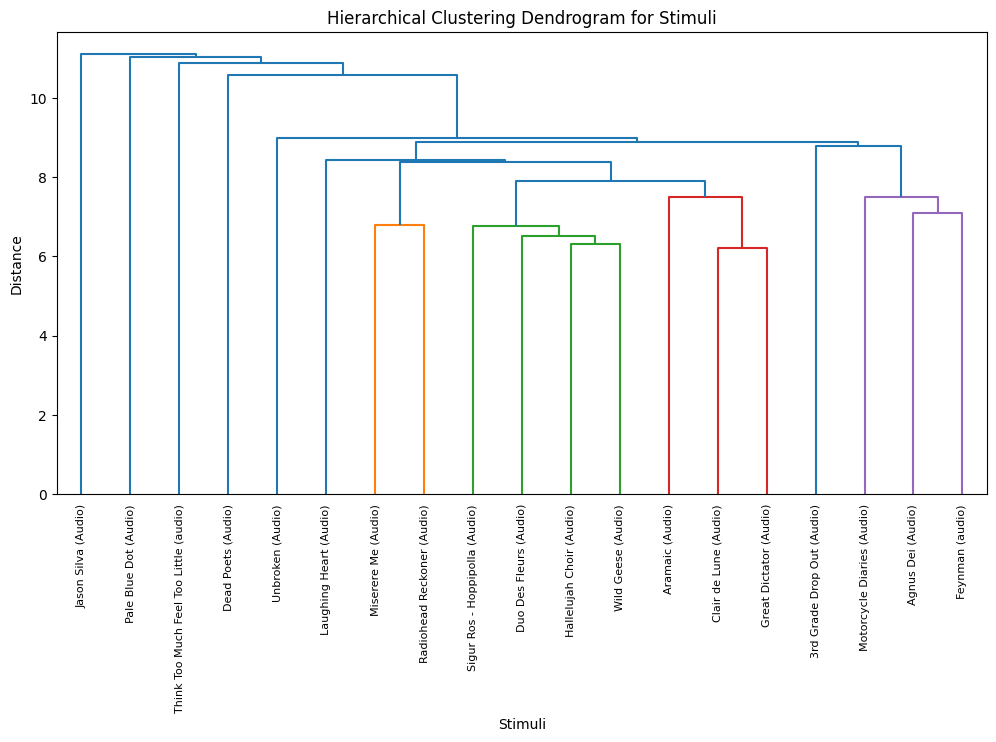

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

stimulus_grouped = dfa.groupby("Stimulus").agg({col: lambda x: np.mean(np.vstack(x), axis=0) for col in pca_columns})
stimulus_pca_features = np.hstack([np.vstack(stimulus_grouped[col]) for col in pca_columns])

# standardizing features
scaler = StandardScaler()
stimulus_pca_scaled = scaler.fit_transform(stimulus_pca_features)

# chills likelihood percentage
#dfa["Chills?"] = dfa["Chills?"].astype(str).str.strip().str.lower()  # Convert to lowercase & remove spaces
#dfa["Chills?"] = dfa["Chills?"].map({"Yes": 1, "No": 0})  # Convert to binary
chills_likelihood = dfa.groupby("Stimulus")["Chills?"].mean()  # % of Yes responses

stimulus_df = pd.DataFrame(stimulus_pca_scaled, index=stimulus_grouped.index)
stimulus_df["Chills Likelihood"] = chills_likelihood.values

linkage_matrix_stimulus = sch.linkage(stimulus_pca_scaled, method="ward")

#2 groups: more likely vs. less likely to cause chills
num_clusters = 2
cluster_labels = fcluster(linkage_matrix_stimulus, num_clusters, criterion="maxclust")
stimulus_df["Cluster"] = cluster_labels

group_1 = stimulus_df[stimulus_df["Cluster"] == 1]  # More likely to cause chills
group_2 = stimulus_df[stimulus_df["Cluster"] == 2]  # Less likely to cause chills

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix_stimulus, labels=stimulus_df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram for Stimuli")
plt.xlabel("Stimuli")
plt.ylabel("Distance")
plt.show()

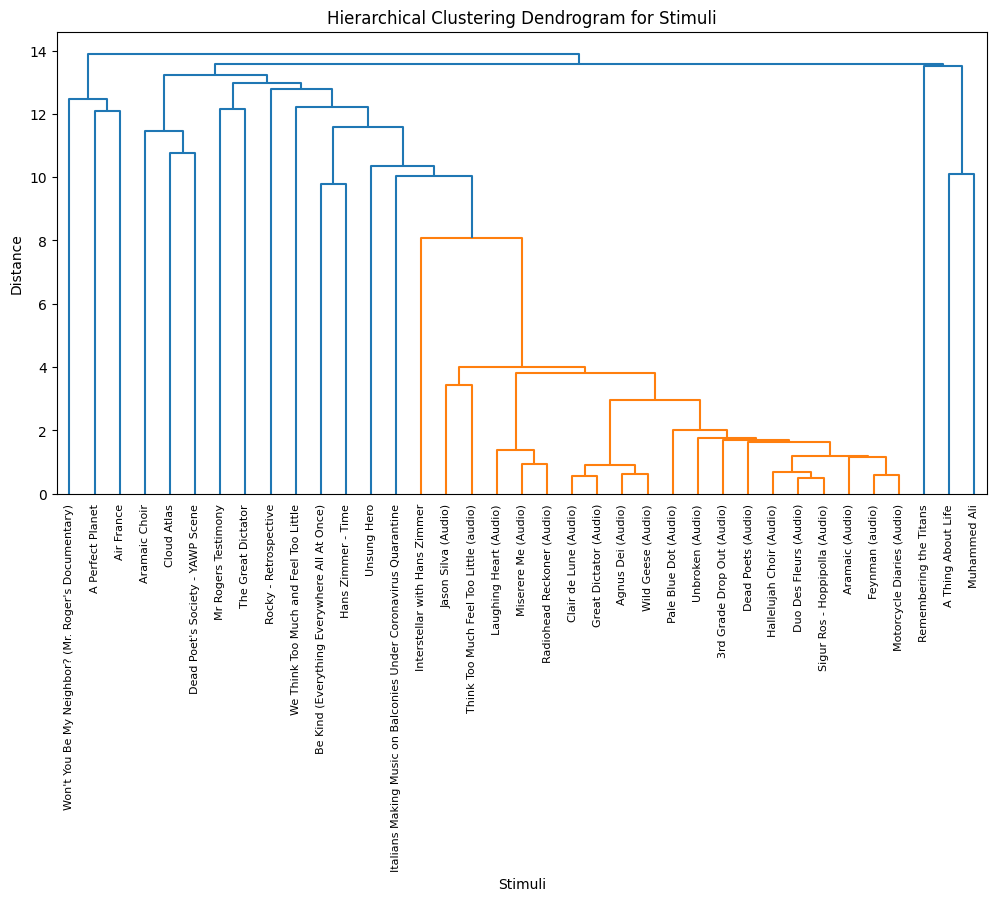

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

stimulus_grouped = df_combined.groupby("Stimulus").agg({col: lambda x: np.mean(np.vstack(x), axis=0) for col in pca_columns})
stimulus_pca_features = np.hstack([np.vstack(stimulus_grouped[col]) for col in pca_columns])

# standardizing features
scaler = StandardScaler()
stimulus_pca_scaled = scaler.fit_transform(stimulus_pca_features)

chills_likelihood = df_combined.groupby("Stimulus")["Chills?"].mean()  # % of Yes responses

stimulus_df = pd.DataFrame(stimulus_pca_scaled, index=stimulus_grouped.index)
stimulus_df["Chills Likelihood"] = chills_likelihood.values

linkage_matrix_stimulus = sch.linkage(stimulus_pca_scaled, method="ward")

#2 groups: more likely vs. less likely to cause chills
num_clusters = 2
cluster_labels = fcluster(linkage_matrix_stimulus, num_clusters, criterion="maxclust")
stimulus_df["Cluster"] = cluster_labels

group_1 = stimulus_df[stimulus_df["Cluster"] == 1]  # More likely to cause chills
group_2 = stimulus_df[stimulus_df["Cluster"] == 2]  # Less likely to cause chills

plt.figure(figsize=(12, 6))
sch.dendrogram(linkage_matrix_stimulus, labels=stimulus_df.index, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram for Stimuli")
plt.xlabel("Stimuli")
plt.ylabel("Distance")
plt.show()

In [ ]:
group_1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,Chills Likelihood,Cluster
Stimulus,,,,,,,,,,,,,,,,,,,,,
A Perfect Planet,-0.642635,0.749533,-0.759471,-0.078793,0.600575,-0.383025,-0.317381,1.742727,-1.073019,0.520995,...,-0.760458,-4.485927,0.295834,-0.895421,1.046851,-1.125293,3.219279,0.969417,0.527778,1
Air France,-1.385672,0.067828,-0.187154,-0.500374,-0.705615,-0.774956,-0.065376,-0.429273,0.213481,0.149201,...,1.002505,-0.873368,0.871780,-0.239321,-1.528212,-3.668441,-0.528974,-0.872133,0.507246,1
Won't You Be My Neighbor? (Mr. Roger's Documentary),-0.065959,-1.243953,-0.408720,-1.137036,-1.699546,-1.049282,-1.165836,-1.094441,0.458778,0.983842,...,-3.224743,0.242039,-0.146937,-0.492011,-0.307012,-0.667615,2.639386,-2.575857,0.532468,1


In [ ]:
group_2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,Chills Likelihood,Cluster
Stimulus,,,,,,,,,,,,,,,,,,,,,
3rd Grade Drop Out (Audio),-0.069337,-0.040695,-0.017771,0.001461,-0.138261,0.065956,0.287032,-0.020311,-0.095650,-0.021778,...,0.036640,0.102090,-0.067791,-0.278666,0.027724,-0.007604,-0.049174,-0.129482,0.532468,2
A Thing About Life,-0.142965,-0.462456,0.100994,1.166437,-0.552132,1.158569,-2.226931,3.225794,0.399377,-0.739139,...,-0.262843,1.411657,-1.360988,-0.406258,2.544506,1.612963,0.170223,2.294904,0.560000,2
Agnus Dei (Audio),-0.007628,0.095234,-0.024449,0.014650,-0.236466,0.134452,0.541444,0.022091,-0.071105,-0.025409,...,0.005469,0.140064,0.175029,-0.297420,0.036040,-0.015252,-0.023919,-0.081277,0.538462,2
Aramaic (Audio),-0.074238,-0.035940,-0.015665,0.009255,-0.137357,0.102132,0.268764,0.064506,0.095954,0.054111,...,-0.386454,0.116912,0.081263,-0.304902,0.024811,-0.016682,-0.026735,-0.079534,0.478261,2
Aramaic Choir,2.485649,3.224073,3.828465,-2.126539,-1.004924,0.099859,-0.765113,0.369743,-0.566206,0.343724,...,0.709351,-0.595942,-0.580214,-0.541365,-3.556294,2.446526,-0.837215,-0.726194,0.525641,2
Be Kind (Everything Everywhere All At Once),0.018446,-0.570422,1.159716,0.549045,-0.760184,0.252209,1.336802,-3.191740,3.594816,-0.544357,...,0.061924,0.523316,0.353536,1.097418,1.134146,-0.187690,-1.498795,-0.526208,0.381579,2
Clair de Lune (Audio),0.119091,-0.069056,-0.040819,0.025055,-0.135723,0.143756,0.265277,0.014655,-0.080525,0.002264,...,-0.084242,0.141900,0.111370,-0.310764,0.023030,-0.009893,-0.027712,-0.072217,0.441558,2
Cloud Atlas,0.467202,-0.976479,-0.018059,0.952376,-0.620951,-2.407734,-2.742363,1.018145,0.911862,4.383882,...,0.347889,1.273490,-0.516654,0.717429,-0.117889,-0.655546,1.031851,-1.958211,0.405405,2
Dead Poet's Society - YAWP Scene,1.765529,-1.572860,0.482104,1.871891,0.108351,-3.448444,-3.085720,-1.871140,-3.590738,-1.679221,...,1.997437,1.551934,-1.349263,0.065215,-1.092746,0.566147,-1.016328,1.314075,0.521127,2


In [ ]:
group_1

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,Chills Likelihood,Cluster
Stimulus,,,,,,,,,,,,,,,,,,,,,
3rd Grade Drop Out (Audio),-0.587198,-0.589400,0.009344,-0.482310,0.281986,-0.716139,0.054807,-0.191115,-0.161856,-0.794185,...,0.358544,0.277781,-1.494780,-0.372568,0.020481,0.040505,-0.431577,-0.542020,0.532468,1
Agnus Dei (Audio),0.483965,2.711875,-0.169192,-0.217587,-1.503956,0.224508,2.785683,0.654166,0.333059,-0.876839,...,0.164300,0.551969,0.019481,-0.402542,0.036783,0.010904,-0.178515,-0.230393,0.538462,1
Aramaic (Audio),-0.672268,-0.473919,0.065633,-0.325868,0.298436,-0.219327,-0.141290,1.499698,3.701584,0.933356,...,-2.277973,0.384806,-0.565258,-0.414500,0.014772,0.005370,-0.206727,-0.219127,0.478261,1
Clair de Lune (Audio),2.683586,-1.278187,-0.606858,-0.008738,0.328152,0.352287,-0.178715,0.505931,0.143117,-0.246892,...,-0.394734,0.565224,-0.377507,-0.423868,0.011280,0.031646,-0.216523,-0.171825,0.441558,1
Dead Poets (Audio),-0.680011,-0.396771,0.042827,-0.383096,0.322629,-0.494842,-0.327034,0.454205,-0.229764,-2.377699,...,0.599412,-1.136438,0.534754,-0.330862,0.090344,-0.029648,-0.553115,4.160822,0.507042,1
Duo Des Fleurs (Audio),-0.643378,-0.267228,0.124668,-0.056338,0.095491,-0.246737,-0.075476,-0.399501,0.220812,0.475471,...,0.518640,-1.149478,-1.278747,-0.402179,0.022301,0.010409,-0.367362,-0.183929,0.450704,1
Feynman (audio),0.236534,1.332652,-1.025763,-0.182686,-1.076853,-0.429787,1.383078,-0.867284,-0.336853,0.602401,...,1.410363,1.285160,2.093473,-0.423258,0.009692,0.026119,-0.217755,-0.174653,0.408451,1
Great Dictator (Audio),2.718077,-1.390934,-0.416683,-0.094764,0.238163,-0.018158,-0.083892,-0.193493,0.009879,0.113032,...,-0.005423,0.507992,0.023323,-0.420605,0.014709,0.035112,-0.240401,-0.186695,0.621622,1
Hallelujah Choir (Audio),-0.361836,-0.389277,-0.370970,-0.101344,-0.224685,-0.565383,0.027346,-1.273156,-0.308578,0.795162,...,0.158645,-0.324303,0.286105,-0.374212,0.036766,0.049216,-0.492873,-0.621921,0.756757,1


In [ ]:
group_2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,Chills Likelihood,Cluster
Stimulus,,,,,,,,,,,,,,,,,,,,,
Jason Silva (Audio),-0.403645,0.100066,0.23041,-0.128045,0.164774,-0.505896,-0.153473,3.131409,-2.087804,1.757212,...,-2.28526,-0.732434,1.01783,3.011439,3.135277,-0.616814,-0.123173,-0.095033,0.561644,2


In [ ]:
import pandas as pd

# Calculate the percentage of "Yes" (Chills) and "No" (No Chills) for each cluster
chills_percentage_group_1 = group_1["Chills Likelihood"].mean() * 100
chills_percentage_group_2 = group_2["Chills Likelihood"].mean() * 100

# Create a DataFrame to display the percentage difference
chills_percentage_comparison = pd.DataFrame({
    "Cluster": ["More Likely to Cause Chills", "Less Likely to Cause Chills"],
    "Percentage of 'Yes' (Chills)": [chills_percentage_group_1, chills_percentage_group_2],
    "Percentage of 'No' (No Chills)": [100 - chills_percentage_group_1, 100 - chills_percentage_group_2]
})

# Print the results
print("Chills Percentage Comparison:")
print(chills_percentage_comparison)



Chills Percentage Comparison:
                       Cluster  Percentage of 'Yes' (Chills)  \
0  More Likely to Cause Chills                     49.560775   
1  Less Likely to Cause Chills                     56.164384   

   Percentage of 'No' (No Chills)  
0                       50.439225  
1                       43.835616  


In [ ]:
import pandas as pd

# Calculate the percentage of "Yes" (Chills) and "No" (No Chills) for each cluster
chills_percentage_group_1 = group_1["Chills Likelihood"].mean() * 100
chills_percentage_group_2 = group_2["Chills Likelihood"].mean() * 100

# Create a DataFrame to display the percentage difference
chills_percentage_comparison = pd.DataFrame({
    "Cluster": ["More Likely to Cause Chills", "Less Likely to Cause Chills"],
    "Percentage of 'Yes' (Chills)": [chills_percentage_group_1, chills_percentage_group_2],
    "Percentage of 'No' (No Chills)": [100 - chills_percentage_group_1, 100 - chills_percentage_group_2]
})

# Print the results
print("Chills Percentage Comparison:")
print(chills_percentage_comparison)



Chills Percentage Comparison:
                       Cluster  Percentage of 'Yes' (Chills)  \
0  More Likely to Cause Chills                     52.249723   
1  Less Likely to Cause Chills                     51.527176   

   Percentage of 'No' (No Chills)  
0                       47.750277  
1                       48.472824  


Feature Comparison Between Groups:
    Group 1 (More Likely to Cause Chills)  \
0                            2.242470e-02   
1                           -5.559219e-03   
2                           -1.280057e-02   
3                            7.113601e-03   
4                           -9.154116e-03   
5                            2.810532e-02   
6                            8.526285e-03   
7                           -1.739672e-01   
8                            1.159891e-01   
9                           -9.762288e-02   
10                           5.131742e-03   
11                          -6.690049e-03   
12                          -2.122993e-03   
13                           1.174178e-02   
14                           4.694418e-03   
15                          -3.971386e-03   
16                          -3.082171e-03   
17                          -8.289285e-03   
18                           7.489295e-03   
19                          -3.856653e-30   
20                  

<Figure size 1500x600 with 0 Axes>

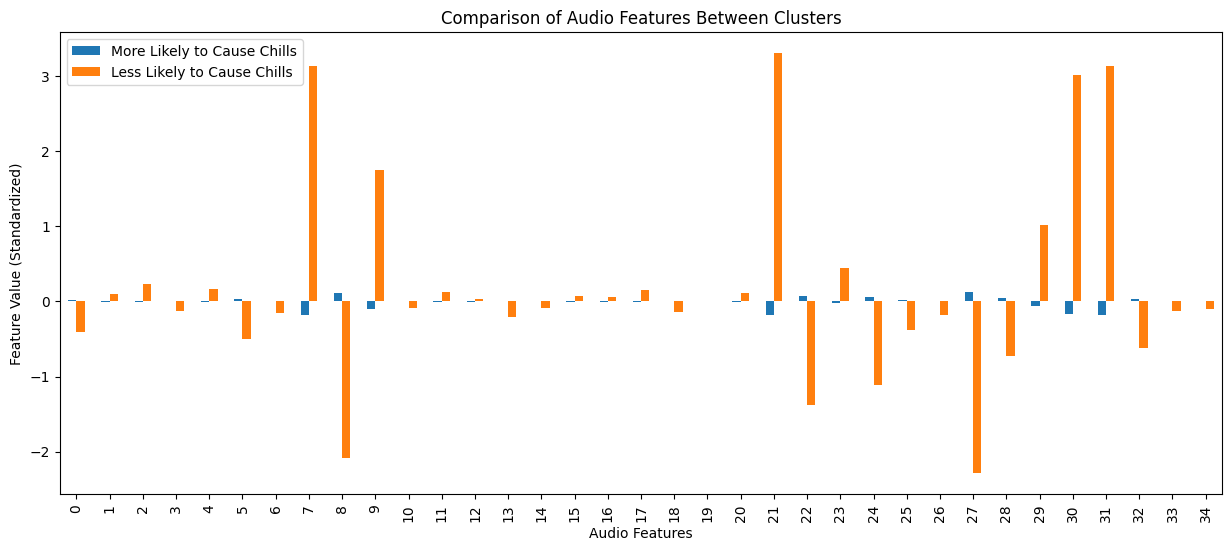

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the average values of each audio feature for both groups
feature_comparison = pd.DataFrame({
    "Group 1 (More Likely to Cause Chills)": group_1.drop(columns=["Chills Likelihood", "Cluster"]).mean(),
    "Group 2 (Less Likely to Cause Chills)": group_2.drop(columns=["Chills Likelihood", "Cluster"]).mean()
})

# Print the feature comparison table
print("Feature Comparison Between Groups:")
print(feature_comparison)

# Plot a bar chart to visualize feature differences
plt.figure(figsize=(15, 6))
feature_comparison.plot(kind="bar", figsize=(15, 6))
plt.title("Comparison of Audio Features Between Clusters")
plt.xlabel("Audio Features")
plt.ylabel("Feature Value (Standardized)")
plt.xticks(rotation=90)
plt.legend(["More Likely to Cause Chills", "Less Likely to Cause Chills"])
plt.show()


Feature Comparison Between Groups:
    Group 1 (More Likely to Cause Chills)  \
0                               -0.698089   
1                               -0.142197   
2                               -0.451782   
3                               -0.572068   
4                               -0.601529   
5                               -0.735755   
6                               -0.516198   
7                                0.073004   
8                               -0.133586   
9                                0.551346   
10                              -0.000246   
11                               1.799699   
12                               1.127137   
13                              -1.298301   
14                               0.880562   
15                               0.030506   
16                               1.218558   
17                               1.030628   
18                               0.173871   
19                               0.452166   
20                  

<Figure size 1500x600 with 0 Axes>

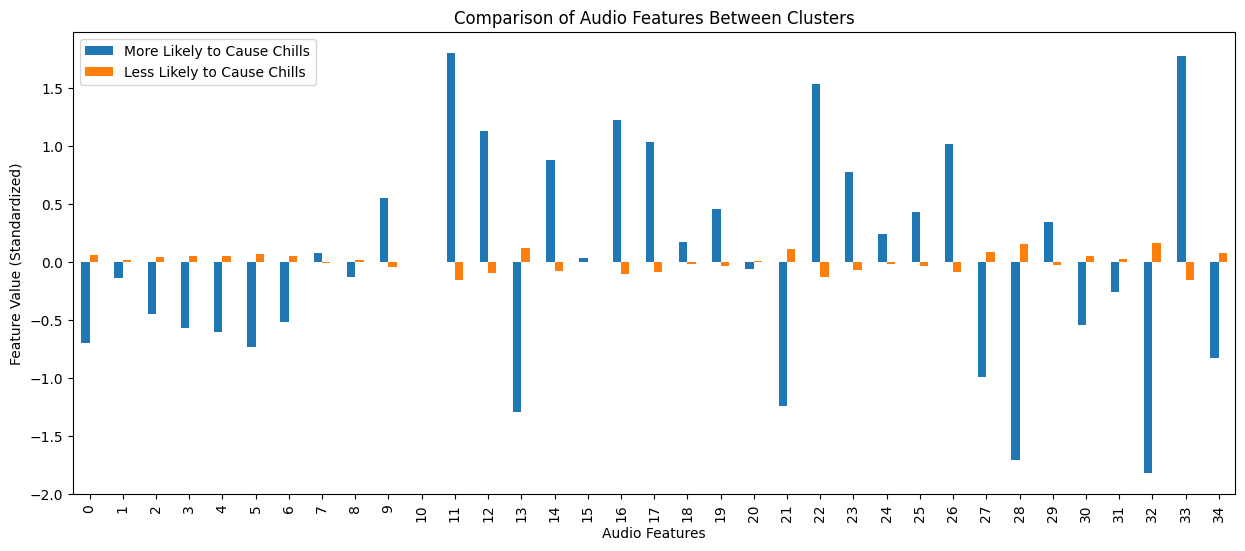

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the average values of each audio feature for both groups
feature_comparison = pd.DataFrame({
    "Group 1 (More Likely to Cause Chills)": group_1.drop(columns=["Chills Likelihood", "Cluster"]).mean(),
    "Group 2 (Less Likely to Cause Chills)": group_2.drop(columns=["Chills Likelihood", "Cluster"]).mean()
})

# Print the feature comparison table
print("Feature Comparison Between Groups:")
print(feature_comparison)

# Plot a bar chart to visualize feature differences
plt.figure(figsize=(15, 6))
feature_comparison.plot(kind="bar", figsize=(15, 6))
plt.title("Comparison of Audio Features Between Clusters")
plt.xlabel("Audio Features")
plt.ylabel("Feature Value (Standardized)")
plt.xticks(rotation=90)
plt.legend(["More Likely to Cause Chills", "Less Likely to Cause Chills"])
plt.show()


In [ ]:
#Simple decision tree classifier for multi modal model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

# Text, Image, and Audio Embeddings
image_embeddings #ADD
text_embeddings #ADD
audio_embeddings #ADD
chills_classifier #ADD

# Combine embeddings
# Will have to zero pad the data to the largest dimension size to make sure the inputs are consistent, can also try truncating?


combined_embeddings = np.concatenate((image_embeddings, text_embeddings, audio_embeddings), axis=1)

embeddings_train, embeddings_test, chills_train, chills_test = train_test_split(combined_embeddings, chills_classifier, test_size=0.2, random_state=22)

# Parameter grid for CV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(combined_embeddings_train, chills_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

#Alternatively, we can also just extract the best clf

best_clf = grid_search.best_estimator_

chills_predicted = best_clf.predict(embeddings_train)

accuracy = accuracy.score(chills_train, chills_test)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5}


NameError: name 'combined' is not defined